In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from gymnasium.wrappers import FrameStack
from gymnasium.experimental.wrappers import GrayscaleObservationV0
import gymnasium as gym
import numpy as np
import tensorflow as tf
import pandas as pd
from IPython.display import clear_output
%config NotebookApp.iopub_msg_rate_limit=10000
import time
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
num_actions = 5
def create_CNN():
    model = Sequential()
    
    model.add(Conv2D(32, (8, 8), strides=(4, 4), padding='same', activation='relu', input_shape=(4, 210, 160)))
    model.add(Conv2D(64, (4, 4), strides=(2, 2), padding='same', activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_actions, activation='linear'))
    return model

In [3]:
model = create_CNN()
model.load_weights('cnn1v2.weights.h5')
env = gym.make('ALE/Frogger-v5')
env = GrayscaleObservationV0(env)
env = FrameStack(env, 4) # Get 4 frames from game at a time
frames, width, height = env.observation_space.shape
env.reset()
game_over = False

C:\Users\btsegaye\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [4]:
def testAI(episodes):
    start_time = time.time()
    stepsAndScore = {'steps': [], 'score': []}
    for i in range(episodes):
        totalSteps = 0
        totalScore = 0
        env.reset()
        state, reward, game_over, x, _ = env.step(0)
        while not game_over:
            #Predict action using the trained model
            q_values = model.predict(np.expand_dims(state, axis=0))
            action = np.argmax(q_values)

            # Take action in the environment
            next_state, reward, game_over, x, _ = env.step(action)

            totalScore += reward
            totalSteps += 1

            # Update current state
            state = next_state
            
            time.sleep(0.001)
            clear_output(wait=True)
            print("episode " + str(i + 1) + "/" + str(episodes))
            print("time: " + str(round((time.time() - start_time),2)) + " sec")
        stepsAndScore['steps'].append(totalSteps-110)
        stepsAndScore['score'].append(totalScore)
    stepsAndScore = pd.DataFrame(stepsAndScore)
    return stepsAndScore

In [5]:
#set number of episodes to test the AI for
episodesToTest = 20

In [6]:
stepsAndScore = testAI(episodesToTest)

episode 20/20
time: 1892.28 sec


In [7]:
stepsAndScore

,steps,score
0,1104,6.0
1,1104,6.0
2,1104,6.0
3,1104,6.0
4,1280,6.0
5,1104,6.0
6,1104,6.0
7,1104,6.0
8,1104,6.0
9,1104,6.0


In [8]:
bestScore = max(stepsAndScore['score'])
avgScore = stepsAndScore['score'].mean()
avgStepsPerScore = round(stepsAndScore['steps'].mean()/avgScore,2)

In [9]:
print("Best Score: " + str(bestScore))
print("Average Score: " + str(avgScore))
print("Average Steps/Score: " + str(avgStepsPerScore))

Best Score: 6.0
Average Score: 6.0
Average Steps/Score: 186.93


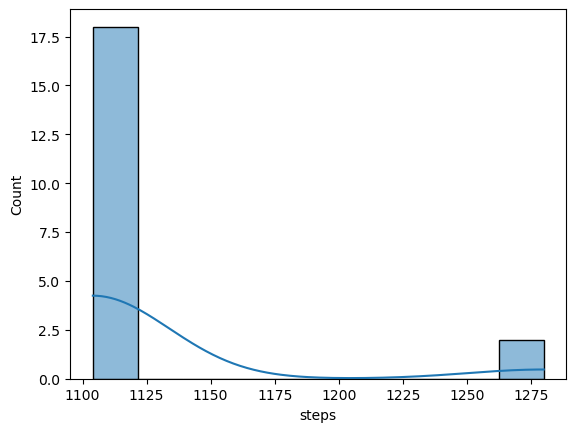

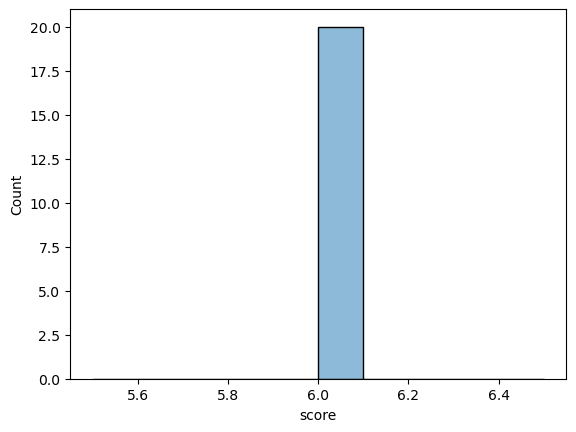

In [10]:
sns.histplot(stepsAndScore['steps'], bins=10, kde=True)
plt.show()
sns.histplot(stepsAndScore['score'], bins=10, kde=True)
plt.show()